In [1]:
# import modules and data

#import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle

%matplotlib inline

In [2]:
# download and extract data from mnist database
# one hot classifies the data ex : for "1" [1,0,0,0,0,0,0,0,0,0]

mnist = input_data.read_data_sets('', one_hot = True)

Extracting train-images-idx3-ubyte.gz
Extracting train-labels-idx1-ubyte.gz
Extracting t10k-images-idx3-ubyte.gz
Extracting t10k-labels-idx1-ubyte.gz


In [3]:
empty = np.zeros((28, 28), dtype = np.float32)
empty_label = np.zeros(10)
possible_elements = [5, 4, 3, 2, 1]

concatenated_images = []
concatenated_labels = []
concatenated_lengths = []
total_elements = 0
elements_count = -1
while(total_elements != 55000):
    labels_added = 1
    elements_count = (elements_count + 1)%5
    no_elements = possible_elements[elements_count]
    
    if(total_elements>54995 and total_elements + no_elements > 55000):
        break
    batch = mnist.train.next_batch(no_elements)
    image = np.split(batch[0][0], 28)
    label = [batch[1][0]]
    for digit in range(1, no_elements):
        image = np.hstack((image, np.split(batch[0][digit], 28)))
        label.append(batch[1][digit])
        labels_added += 1
    for digit in range(5-no_elements):
        image = np.hstack((image, empty))
        label.append(empty_label)
        
    length = np.zeros(5)
    length[labels_added-1] = 1.0
    
    concatenated_images.append(image)
    concatenated_labels.append(label)
    concatenated_lengths.append(length)
    total_elements += no_elements


In [4]:
print(len(concatenated_images))
print(concatenated_images[11])
print(concatenated_labels[11])

18332
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]), array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])]


[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]), array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]), array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])]
[ 0.  0.  0.  1.  0.]


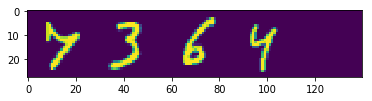

In [5]:
plt.imshow(concatenated_images[11])
print(concatenated_labels[11])
print(concatenated_lengths[11])

In [6]:
set_images_filename = 'images.pickle'
set_labels_filename = 'labels.pickle'
set_lengths_filename = 'lengths.pickle'
def maybe_pickle(set_filename, data):
    try:
        with open(set_filename, 'wb') as f:
            pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', set_filename, ':', e)

maybe_pickle(set_images_filename, concatenated_images)
maybe_pickle(set_labels_filename, concatenated_labels)
maybe_pickle(set_lengths_filename, concatenated_lengths)